In [16]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rcParams
import yfinance as yf
import requests
import time


# 設置繁體中文字型
rcParams['font.family'] = 'Microsoft JhengHei'  # 微軟正黑體
rcParams['axes.unicode_minus'] = False  # 解決負號顯示問題

In [19]:

# 下載VIX數據
vxx = yf.download("VXX", start="2022-01-02", end="2025-01-02")
vxx


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,292.480011,298.399994,285.760010,286.399994,286.399994,2412319
2022-01-04,284.160004,294.720001,283.359985,286.079987,286.079987,2586025
2022-01-05,288.320007,308.959991,281.600006,308.640015,308.640015,4891438
2022-01-06,309.920013,315.200012,300.880005,310.079987,310.079987,4079613
2022-01-07,309.119995,317.760010,299.679993,301.119995,301.119995,3269444
...,...,...,...,...,...,...
2024-12-24,43.970001,44.049999,42.180000,42.279999,42.279999,2884300
2024-12-26,42.610001,44.015999,42.255001,42.549999,42.549999,3616100
2024-12-27,43.180000,46.869999,43.088001,44.430000,44.430000,5905700


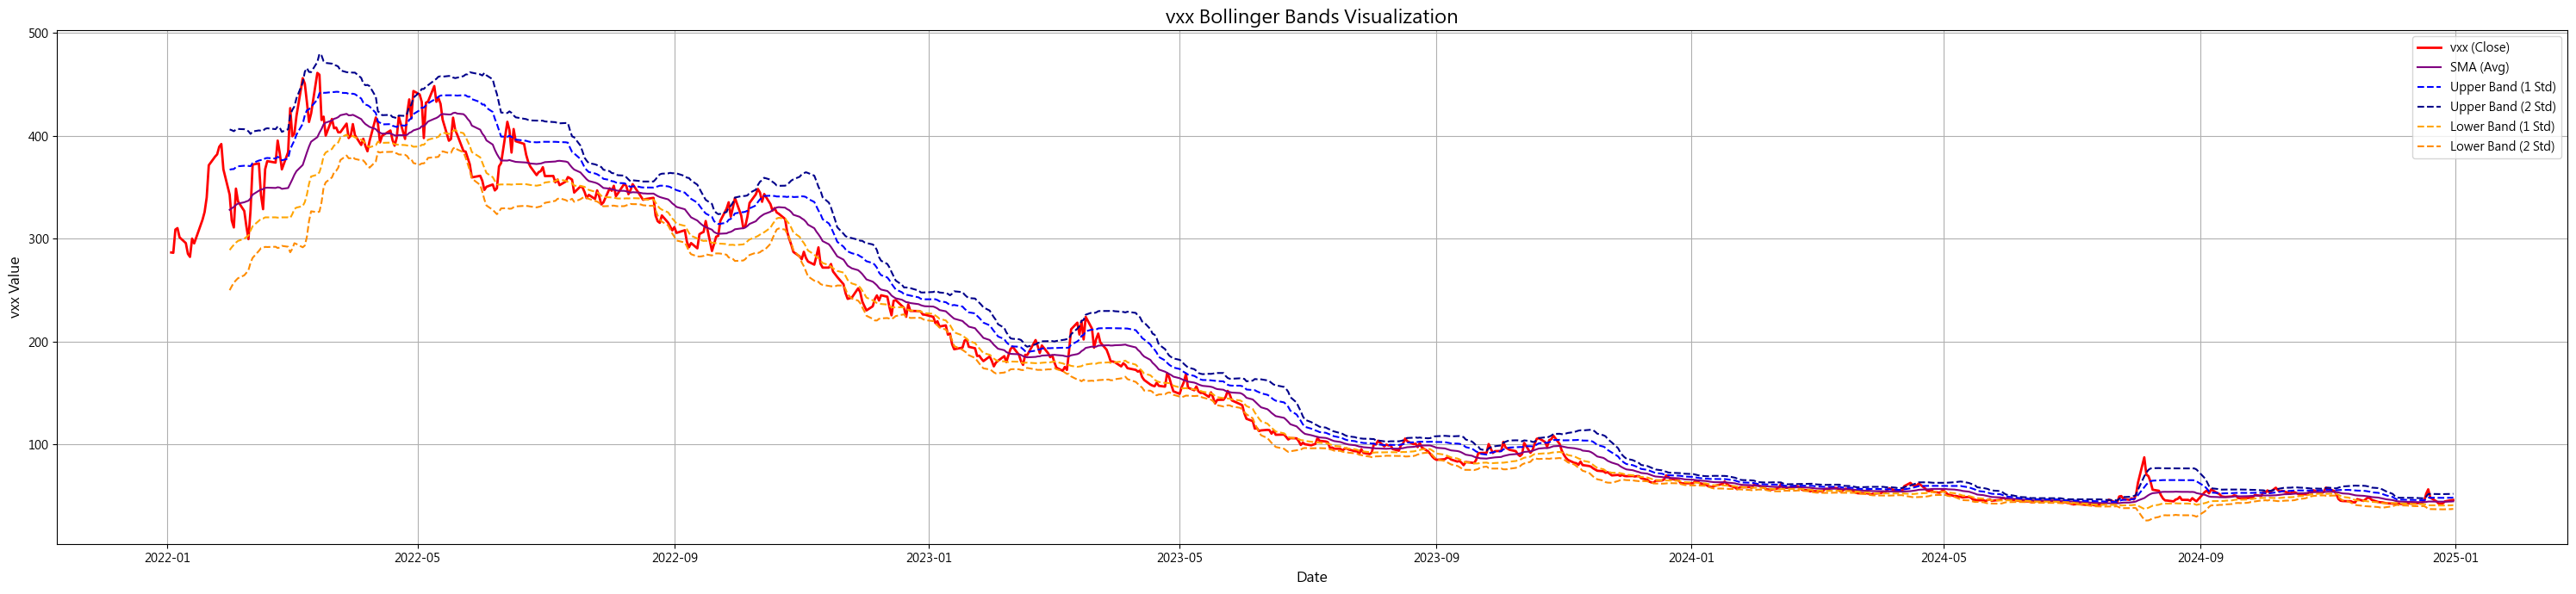

In [20]:
# 計算布林帶函數
def calculate_bollinger_bands(data, window):
    """
    計算布林帶，包含移動平均線 (SMA)、1個和2個標準差的上下軌
    """
    data['SMA'] = data['Close'].rolling(window=window).mean()
    data['Upper_Band_1'] = data['SMA'] + 1 * data['Close'].rolling(window=window).std()
    data['Upper_Band_2'] = data['SMA'] + 2 * data['Close'].rolling(window=window).std()
    data['Lower_Band_1'] = data['SMA'] - 1 * data['Close'].rolling(window=window).std()
    data['Lower_Band_2'] = data['SMA'] - 2 * data['Close'].rolling(window=window).std()

# 計算布林帶
calculate_bollinger_bands(vxx, window=20)

# 繪製圖表
plt.figure(figsize=(30, 7))

# 繪製vxx收盤價
plt.plot(vxx.index, vxx['Close'], label="vxx (Close)", color="red", linewidth=2)

# 繪製布林帶
plt.plot(vxx.index, vxx['SMA'], label="SMA (Avg)", color="purple", linewidth=1.5)
plt.plot(vxx.index, vxx['Upper_Band_1'], label="Upper Band (1 Std)", color="blue", linestyle="--")
plt.plot(vxx.index, vxx['Upper_Band_2'], label="Upper Band (2 Std)", color="darkblue", linestyle="--")
plt.plot(vxx.index, vxx['Lower_Band_1'], label="Lower Band (1 Std)", color="orange", linestyle="--")
plt.plot(vxx.index, vxx['Lower_Band_2'], label="Lower Band (2 Std)", color="darkorange", linestyle="--")

# 添加標題和標籤
plt.title("vxx Bollinger Bands Visualization", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("vxx Value", fontsize=12)
plt.legend(loc="best")

# 格式化和顯示
plt.grid(True)
plt.tight_layout()
plt.show()

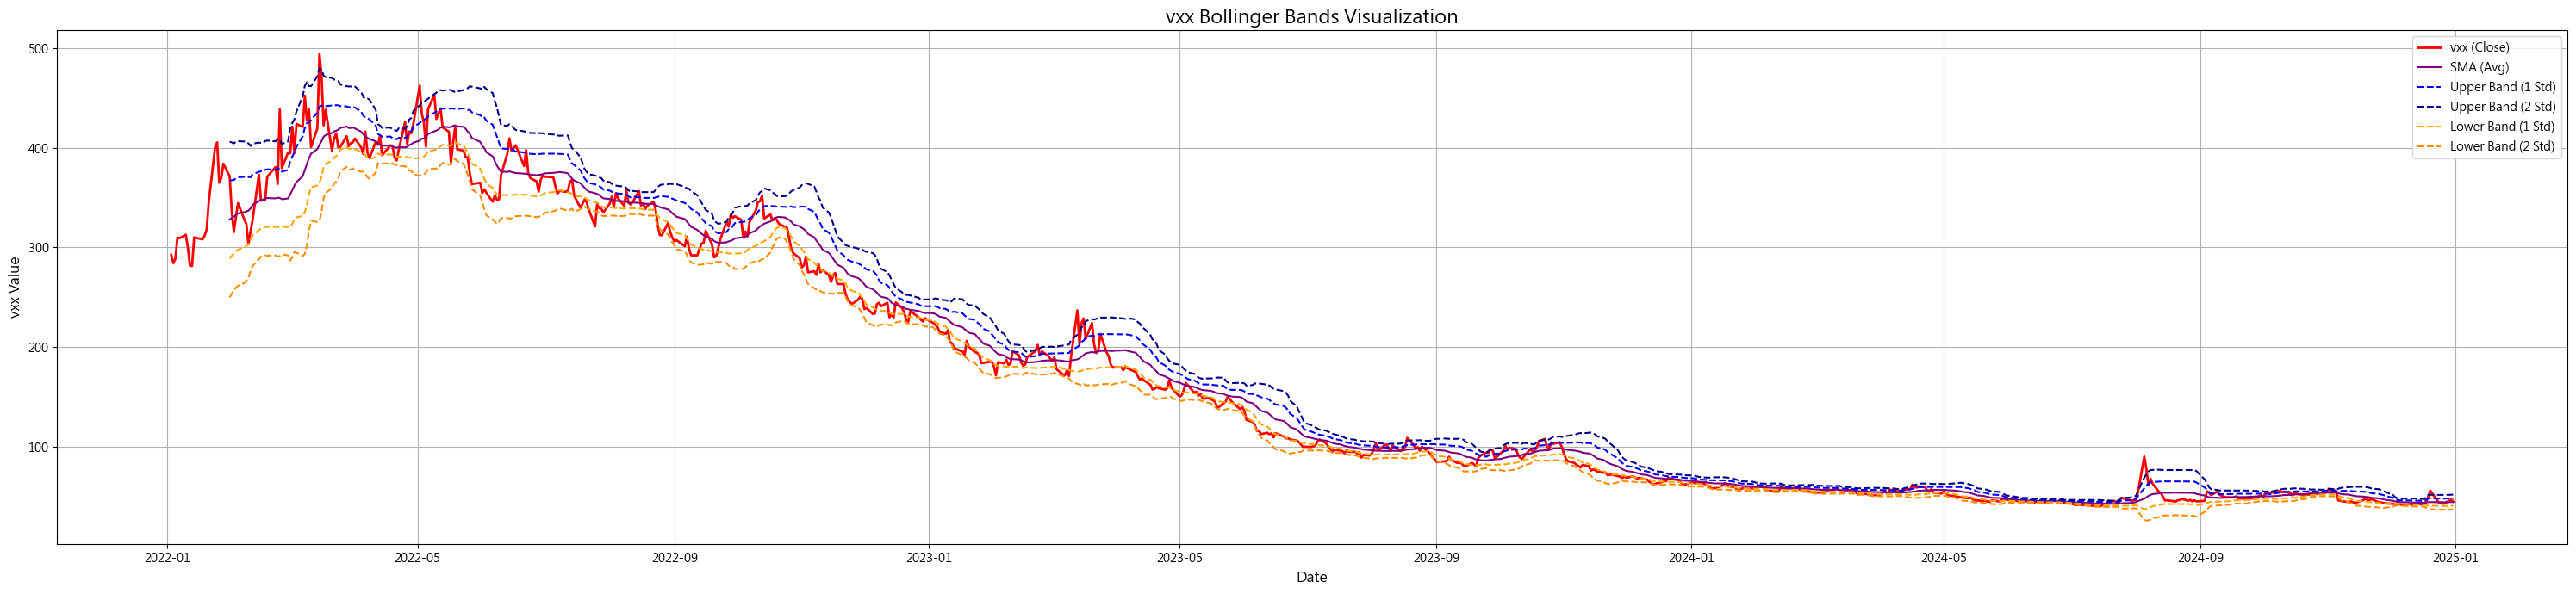

In [21]:
# 計算布林帶函數
def calculate_bollinger_bands(data, window):
    """
    計算布林帶，包含移動平均線 (SMA)、1個和2個標準差的上下軌
    """
    data['SMA'] = data['Close'].rolling(window=window).mean()
    data['Upper_Band_1'] = data['SMA'] + 1 * data['Close'].rolling(window=window).std()
    data['Upper_Band_2'] = data['SMA'] + 2 * data['Close'].rolling(window=window).std()
    data['Lower_Band_1'] = data['SMA'] - 1 * data['Close'].rolling(window=window).std()
    data['Lower_Band_2'] = data['SMA'] - 2 * data['Close'].rolling(window=window).std()

# 計算布林帶
calculate_bollinger_bands(vxx, window=20)

# 繪製圖表
plt.figure(figsize=(30, 7))

# 繪製vxx收盤價
plt.plot(vxx.index, vxx['Open'], label="vxx (Close)", color="red", linewidth=2)

# 繪製布林帶
plt.plot(vxx.index, vxx['SMA'], label="SMA (Avg)", color="purple", linewidth=1.5)
plt.plot(vxx.index, vxx['Upper_Band_1'], label="Upper Band (1 Std)", color="blue", linestyle="--")
plt.plot(vxx.index, vxx['Upper_Band_2'], label="Upper Band (2 Std)", color="darkblue", linestyle="--")
plt.plot(vxx.index, vxx['Lower_Band_1'], label="Lower Band (1 Std)", color="orange", linestyle="--")
plt.plot(vxx.index, vxx['Lower_Band_2'], label="Lower Band (2 Std)", color="darkorange", linestyle="--")

# 添加標題和標籤
plt.title("vxx Bollinger Bands Visualization", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("vxx Value", fontsize=12)
plt.legend(loc="best")

# 格式化和顯示
plt.grid(True)
plt.tight_layout()
plt.show()

In [10]:
vxx['MA'] = vxx['Close'].rolling(50).mean()
# 計算標準差
rolling_std = vxx['Close'].rolling(50).std()
        
# 計算布林帶（1個標準差和2個標準差）
vxx['Upper_Band1'] = vxx['MA'] + rolling_std
vxx['Lower_Band1'] = vxx['MA'] - rolling_std
vxx['Upper_Band2'] = vxx['MA'] + 2 * rolling_std
vxx['Lower_Band2'] = vxx['MA'] - 2 * rolling_std
vxx

,Open,High,Low,Close,Adj Close,Volume,MA,Upper_Band1,Lower_Band1,Upper_Band2,Lower_Band2
Date,,,,,,,,,,,
2018-01-25,1770.239990,1770.239990,1770.239990,1770.239990,1770.239990,0,NaN,NaN,NaN,NaN,NaN
2018-01-26,1770.239990,1770.239990,1770.239990,1770.239990,1770.239990,0,NaN,NaN,NaN,NaN,NaN
2018-01-29,1868.800049,1893.119995,1868.800049,1893.119995,1893.119995,22,NaN,NaN,NaN,NaN,NaN
2018-01-30,1970.560059,2035.839966,1951.359985,1955.199951,1955.199951,989,NaN,NaN,NaN,NaN,NaN
2018-01-31,1917.439941,1963.520020,1917.439941,1961.599976,1961.599976,144,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2024-12-24,43.970001,44.049999,42.180000,42.279999,42.279999,2884300,47.4780,52.404576,42.551424,57.331151,37.624849
2024-12-26,42.610001,44.015999,42.255001,42.549999,42.549999,3616100,47.2520,52.139333,42.364667,57.026666,37.477334
2024-12-27,43.180000,46.869999,43.088001,44.430000,44.430000,5905700,47.0740,51.897101,42.250900,56.720201,37.427799


In [11]:
vxx['Signal'] = 0
vxx['Position'] = 0

# 多頭信號條件：從下往上突破第一條布林線上軌（1個標準差）
long_signal = (vxx['Close'] > vxx['Upper_Band1']) & (vxx['Close'].shift(1) <= vxx['Upper_Band1'].shift(1))
        
# 空頭信號條件：從上往下突破第一條布林線下軌（1個標準差）
short_signal = (vxx['Close'] < vxx['Lower_Band1']) & (vxx['Close'].shift(1) >= vxx['Lower_Band1'].shift(1))

long_signal


Date
2018-01-25    False
2018-01-26    False
2018-01-29    False
2018-01-30    False
2018-01-31    False
              ...  
2024-12-24    False
2024-12-26    False
2024-12-27    False
2024-12-30    False
2024-12-31    False
Length: 1745, dtype: bool

In [13]:
# 計算 True 的數量
true_count = short_signal.sum()
print(f"Number of True values in long_signal: {true_count}")

Number of True values in long_signal: 90
